# 데이터 분석 순서
### 1. 파일을 읽어서 데이터를 가볍게 살펴보기
### 2. 탐색, 시각화 => 인사이트 도출
### 3. 본격적 탐색
+ ####   1) 문항을 결정해서, 세부적으로 탐색 
+ ####   2) 그룹별 통계, 세부적인 시각화

### 4. 분석을 해놓은 결과가 합당한지 검증작업
### 5. 최종결론 도출

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
food = pd.read_csv('chipotle.tsv' , sep = '\t') #tsv파일이므로 sep(구분자)를 통해 탭으로 구분해줘 
food
# order_id : 주문번호 1번사람은 4개를 삼 딱히 크게 의미 없음
# quantity : 수량
# item_name : 상품이름


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [23]:
food.dtypes # item_price ~> 문자열임 따라서 정수형으로 변경이 필요

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [24]:
food.shape

(4622, 5)

In [25]:
food.info()
#choice_description에는 널값이 많다는걸 파악할 수 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [26]:
food.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [27]:
food.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [28]:
food.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [16]:
food.index

RangeIndex(start=0, stop=4622, step=1)

In [31]:
#타입변경
food['order_id'] = food['order_id'].astype(str) #시리즈의 멤버함수 astype(변경하고싶은 타입 넣기)
food['order_id'].head()

0    1
1    1
2    1
3    1
4    2
Name: order_id, dtype: object

In [32]:
#데이터 전체 기본 통계로 요약해보기
food.describe() #모든 숫자타입을 가지는 컬럼에 대해서 기본 통계를 보여줌

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


### 메뉴가 무엇이 있었나?
### 주문은 몇 개나 있었던 것일까?

In [35]:
#중복된 값을 뺴기 : .unique() 사용
food['item_name'].unique()

50

In [36]:
#주문은 몇 개나 있었던 것일까?
len(food['order_id'].unique())

1834

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

#f_path = "/Users/administrator/Library/Fonts/AppleGothic.ttf"
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [47]:
#가장 많이 주문한 메뉴명?

item_count = food['item_name'].value_counts() #항목별 개수 + 내림차순
item_count2 = item_count.head(10)
item_count2

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [94]:
#그룹으로 묶은 경우 내림차순 x
food.groupby('item_name').count()

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,54,54,54,54
Barbacoa Bowl,66,66,66,66
Barbacoa Burrito,91,91,91,91
Barbacoa Crispy Tacos,11,11,11,11
Barbacoa Salad Bowl,10,10,10,10
Barbacoa Soft Tacos,25,25,25,25
Bottled Water,162,162,0,162
Bowl,2,2,2,2
Burrito,6,6,6,6


In [58]:
item_count2 = item_count[:10] #시리즈 : 인덱스 객체 + ndarray 객체의 조합
item_count2

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [52]:
type(item_count) # 인덱스가 숫자가 아닌 문자로 나와서 시리즈 처럼 안보이지만 시리즈임

pandas.core.series.Series

In [59]:
item_count2.index.tolist()

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink',
 'Chips',
 'Steak Bowl',
 'Bottled Water',
 'Chicken Soft Tacos',
 'Chips and Fresh Tomato Salsa']

In [60]:
item_count2.values

array([726, 553, 479, 368, 301, 211, 211, 162, 115, 110], dtype=int64)

<BarContainer object of 10 artists>

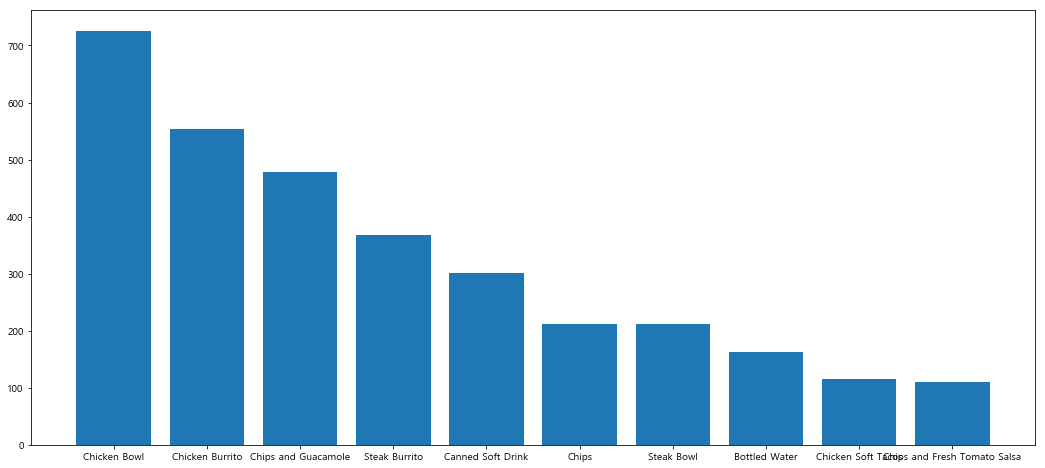

In [64]:
# x(인덱스), y(값)축으로 그래프 그리기
# 많이 팔린 item 10개를 막대 그래프로 그려보자

plt.figure(figsize = (18,8)) #그래프 조절
plt.bar(item_count2.index, item_count2.values) #plt.bar(x축값, y축값) 


In [73]:
#순위별로 프린트 해보기
# TOP 1 : Chicken Bowl 726
item_index = item_count2.index.tolist()
item_index2 = item_count2.values.tolist()

for i in range(len(item_count2)):
    print('TOP',i+1,' : ',item_index[i],item_index2[i])


TOP 1  :  Chicken Bowl 726
TOP 2  :  Chicken Burrito 553
TOP 3  :  Chips and Guacamole 479
TOP 4  :  Steak Burrito 368
TOP 5  :  Canned Soft Drink 301
TOP 6  :  Chips 211
TOP 7  :  Steak Bowl 211
TOP 8  :  Bottled Water 162
TOP 9  :  Chicken Soft Tacos 115
TOP 10  :  Chips and Fresh Tomato Salsa 110


In [81]:
item_count.to_frame()
food[['item_name','quantity']].groupby('item_name').count().head(10)

,quantity
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


In [83]:
#enumerate : 인덱스와 값 두개를 모두 빼줄수 있는 함수(열거하다) : Jquery의 $('list').each() : index랑 list의 항목을 하나씩 꺼내는 기능 
#item은 튜플형태로 나옴
for i, item in enumerate(item_count.iteritems(), 0): #iter : 반복 즉, 아이템들을 반복시켜서 하나씩 꺼내서 변수에 넣어줌/ 0 : 몇번째 인덱스
                                                    #.iteritems()를 써야지만 인덱스, 값 둘다 가져올 수 있음
    print('TOP',i+1,' : ', item)

TOP 1  :  ('Chicken Bowl', 726)
TOP 2  :  ('Chicken Burrito', 553)
TOP 3  :  ('Chips and Guacamole', 479)
TOP 4  :  ('Steak Burrito', 368)
TOP 5  :  ('Canned Soft Drink', 301)
TOP 6  :  ('Chips', 211)
TOP 7  :  ('Steak Bowl', 211)
TOP 8  :  ('Bottled Water', 162)
TOP 9  :  ('Chicken Soft Tacos', 115)
TOP 10  :  ('Chips and Fresh Tomato Salsa', 110)
TOP 11  :  ('Chicken Salad Bowl', 110)
TOP 12  :  ('Canned Soda', 104)
TOP 13  :  ('Side of Chips', 101)
TOP 14  :  ('Veggie Burrito', 95)
TOP 15  :  ('Barbacoa Burrito', 91)
TOP 16  :  ('Veggie Bowl', 85)
TOP 17  :  ('Carnitas Bowl', 68)
TOP 18  :  ('Barbacoa Bowl', 66)
TOP 19  :  ('Carnitas Burrito', 59)
TOP 20  :  ('Steak Soft Tacos', 55)
TOP 21  :  ('6 Pack Soft Drink', 54)
TOP 22  :  ('Chips and Tomatillo Red Chili Salsa', 48)
TOP 23  :  ('Chicken Crispy Tacos', 47)
TOP 24  :  ('Chips and Tomatillo Green Chili Salsa', 43)
TOP 25  :  ('Carnitas Soft Tacos', 40)
TOP 26  :  ('Steak Crispy Tacos', 35)
TOP 27  :  ('Chips and Tomatillo-Green 

In [84]:
#enumerate 반복문 : index, 반복할 item을 둘 다 꺼내주고 싶을 떄 사용
data100 = [100,200,300]

for i, item in enumerate(data100, 0): #0은 index의 start값
    print(i, ':', item)

0 : 100
1 : 200
2 : 300


In [89]:
#시리즈의 values만 꺼내오고 싶으면, 시리즈를 enumerate에 입력값으로 넣어주면 됨
#시리즈를 tolist()하면 시리즈의 values만 리스트로 만들어 진다.
for i, item in enumerate(item_count2.tolist(), 0):
    print('TOP ', i+1, ':', item)

TOP  1 : 726
TOP  2 : 553
TOP  3 : 479
TOP  4 : 368
TOP  5 : 301
TOP  6 : 211
TOP  7 : 211
TOP  8 : 162
TOP  9 : 115
TOP  10 : 110


In [90]:
#enumerate : 인덱스와 값 두개를 모두 빼줄수 있는 함수(열거하다) : Jquery의 $('list').each() : index랑 list의 항목을 하나씩 꺼내는 기능 
#item은 튜플형태로 나옴
for i, (pre, post) in enumerate(item_count.iteritems(), 0): #iter : 반복 즉, 아이템들을 반복시켜서 하나씩 꺼내서 변수에 넣어줌/ 0 : 몇번째 인덱스
                                                    #.iteritems()를 써야지만 인덱스, 값 둘다 가져올 수 있음
    print('TOP',i+1,' : ', pre, post) #pre, post : 튜플로 된거 나눠줌

TOP 1  :  Chicken Bowl 726
TOP 2  :  Chicken Burrito 553
TOP 3  :  Chips and Guacamole 479
TOP 4  :  Steak Burrito 368
TOP 5  :  Canned Soft Drink 301
TOP 6  :  Chips 211
TOP 7  :  Steak Bowl 211
TOP 8  :  Bottled Water 162
TOP 9  :  Chicken Soft Tacos 115
TOP 10  :  Chips and Fresh Tomato Salsa 110
TOP 11  :  Chicken Salad Bowl 110
TOP 12  :  Canned Soda 104
TOP 13  :  Side of Chips 101
TOP 14  :  Veggie Burrito 95
TOP 15  :  Barbacoa Burrito 91
TOP 16  :  Veggie Bowl 85
TOP 17  :  Carnitas Bowl 68
TOP 18  :  Barbacoa Bowl 66
TOP 19  :  Carnitas Burrito 59
TOP 20  :  Steak Soft Tacos 55
TOP 21  :  6 Pack Soft Drink 54
TOP 22  :  Chips and Tomatillo Red Chili Salsa 48
TOP 23  :  Chicken Crispy Tacos 47
TOP 24  :  Chips and Tomatillo Green Chili Salsa 43
TOP 25  :  Carnitas Soft Tacos 40
TOP 26  :  Steak Crispy Tacos 35
TOP 27  :  Chips and Tomatillo-Green Chili Salsa 31
TOP 28  :  Steak Salad Bowl 29
TOP 29  :  Nantucket Nectar 27
TOP 30  :  Barbacoa Soft Tacos 25
TOP 31  :  Chips and 

In [91]:
#제일 많이 팔린 메뉴명
item_count.index[0]

'Chicken Bowl'

In [92]:
#제일 많이 팔린 개수
item_count.values[0]

726

In [107]:
#item당 주문개수, 주문총량을 구해보세요
order_count2 = food.groupby('item_name')['order_id'].count() #특정컬럼에 대해 그룹으로 묶고 카운트하기
                #item_name의 값으로 그룹을 지어서, order_id만 count해보기
order_count2[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [109]:
#item당 주문개수, 주문총량을 구해보세요
order_count3 = food.groupby('item_name')['quantity'].sum() #특정컬럼에 대해 그룹으로 묶고 카운트하기
                #item_name의 값으로 그룹을 지어서, quantity만 더해보기
order_count3[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [108]:
food['quantity'].sum()

4972

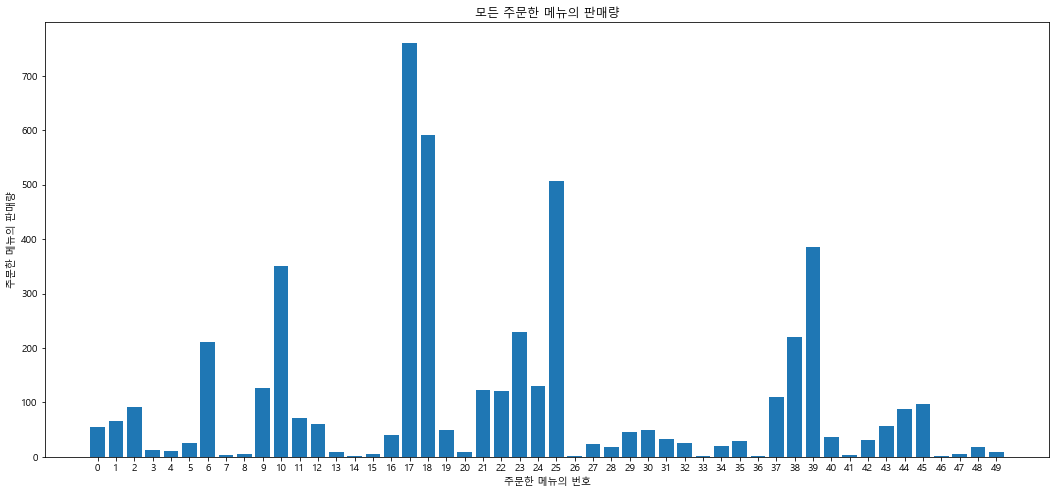

In [116]:
#50개를 그려봅시다.
#x축 : 50개의 메뉴명 => 숫자를 부여하자(메뉴명이 너무 많아서)
x2 = np.arange(50) #0~49까지의 배열생성

#y축 : 메뉴별 판매량
y2 = order_count3.values

plt.figure(figsize = (18,8))
plt.bar(x2, y2)
plt.xticks(np.arange(0,50,1)) #xticks
plt.title('모든 주문한 메뉴의 판매량')
plt.xlabel('주문한 메뉴의 번호')
plt.ylabel('주문한 메뉴의 판매량')
plt.show()

In [117]:
food

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [123]:
type(food['item_price']) #열에 대한 타입

pandas.core.series.Series

In [122]:
food['item_price'].dtype #dtype('o') ~> object 시리즈에 들어있는 인스턴스의 타입

dtype('O')

In [124]:
food.dtypes #시리즈들의 전체 타입

order_id              object
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [125]:
#item_price 는 object형이라 계산 못해 따라서 변경해줘야함
food['item_price'][:5]

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [136]:
#타입변경 시리즈명.astype() :시리즈 타입  / float()
# 문자제거($지워주기)
#1) strip함수
food['item_price'][4].lstrip('$').rstrip(' ')
#2) 슬라이싱
food['item_price'][4][1:].rstrip(' ')

'16.98'

In [140]:
#형변환( 문자 -> 실수)
float(food['item_price'][4][1:])

16.98

In [138]:
#시리즈를 모두 변경하기 위해서는 for문 있어야함
#float()함수는 비파괴 =>>> float() 캐스팅한 결과를 리스트에 모아놓았다가,
#반복문이 모두 끝나면 리스트에 모아놓은 데이터를 df의 컬럼에 다시 집어 넣는다.

In [139]:
result = []
for price in food['item_price']:
    result.append(float(price[1:]))
result[:10]

[2.39, 3.39, 3.39, 2.39, 16.98, 10.98, 1.69, 11.75, 9.25, 9.25]

In [141]:
food['item_price'] = result #비파괴함수이므로 다시 집어 넣어줘야한다.

In [143]:
food['item_price'][:10].dtype

dtype('float64')

In [144]:
food.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


# <Step4. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색
+ 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기
+ 주문당 평균 계산금액 출력하기
+ 한 주문에 40달러 이상 사용한 주문의 id들 출력하기
+ 각 아이템의 가격 구하기
+ 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
+ "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기
+ "Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기


# 주문당 평균 계산금액 출력하기 

In [193]:
food.head()
food['order_id'] = food['order_id'].astype(int) #비파괴라 변경해줘야함
food.dtypes

order_id                int32
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [198]:
test1 = food[['order_id','quantity','item_price']] #test1변수에 food데이터 프레임 중 order_id, quantity, item_price 컬럼만을 취하는 df생성
test1[:10]

,order_id,quantity,item_price
0,1,1,2.39
1,1,1,3.39
2,1,1,3.39
3,1,1,2.39
4,2,2,16.98
5,3,1,10.98
6,3,1,1.69
7,4,1,11.75
8,4,1,9.25
9,5,1,9.25


In [199]:
test1['order_id'].unique() #유니크한 주문번호 출력

array([   1,    2,    3, ..., 1832, 1833, 1834], dtype=int64)

In [204]:
test2 = test1['quantity']*test1['item_price'] #수량 X 가격
test2[:10]

0     2.39
1     3.39
2     3.39
3     2.39
4    33.96
5    10.98
6     1.69
7    11.75
8     9.25
9     9.25
dtype: float64

In [213]:
#order_id1 : order_id와 상품가격(수량 X 가격)
order_id1 = test1['order_id'].to_frame()
order_id1['item_price'] = test2
order_id1[:10]

,order_id,item_price
0,1,2.39
1,1,3.39
2,1,3.39
3,1,2.39
4,2,33.96
5,3,10.98
6,3,1.69
7,4,11.75
8,4,9.25
9,5,9.25


In [228]:
#1일 떄 평균 , 2일때 평균 .....
order_id1[order_id1['order_id'] == 1]['item_price'].mean()

2.89

In [350]:
len(order_id1['order_id'].unique())

1834

In [233]:
#반복문을 통해 주문번호에 따른 평균가격 구하기
for i in range(len(order_id1['order_id'].unique())):
    print('주문번호 ',i+1,'번의 평균가격 :',order_id1[order_id1['order_id'] == i+1]['item_price'].mean(),'원')

주문번호  1 번의 평균가격 : 2.89 원
주문번호  2 번의 평균가격 : 33.96 원
주문번호  3 번의 평균가격 : 6.335 원
주문번호  4 번의 평균가격 : 10.5 원
주문번호  5 번의 평균가격 : 6.85 원
주문번호  6 번의 평균가격 : 8.75 원
주문번호  7 번의 평균가격 : 7.85 원
주문번호  8 번의 평균가격 : 5.44 원
주문번호  9 번의 평균가격 : 6.425000000000001 원
주문번호  10 번의 평균가격 : 6.6 원
주문번호  11 번의 평균가격 : 6.19 원
주문번호  12 번의 평균가격 : 7.1850000000000005 원
주문번호  13 번의 평균가격 : 5.44 원
주문번호  14 번의 평균가격 : 5.04 원
주문번호  15 번의 평균가격 : 5.44 원
주문번호  16 번의 평균가격 : 5.34 원
주문번호  17 번의 평균가격 : 5.04 원
주문번호  18 번의 평균가격 : 6.225 원
주문번호  19 번의 평균가격 : 6.95 원
주문번호  20 번의 평균가격 : 9.05 원
주문번호  21 번의 평균가격 : 7.786666666666666 원
주문번호  22 번의 평균가격 : 6.49 원
주문번호  23 번의 평균가격 : 6.675000000000001 원
주문번호  24 번의 평균가격 : 6.035 원
주문번호  25 번의 평균가격 : 5.69 원
주문번호  26 번의 평균가격 : 10.25 원
주문번호  27 번의 평균가격 : 6.95 원
주문번호  28 번의 평균가격 : 8.425 원
주문번호  29 번의 평균가격 : 8.99 원
주문번호  30 번의 평균가격 : 7.786666666666666 원
주문번호  31 번의 평균가격 : 5.34 원
주문번호  32 번의 평균가격 : 6.49 원
주문번호  33 번의 평균가격 : 6.6 원
주문번호  34 번의 평균가격 : 7.1 원
주문번호  35 번의 평균가격 : 6.7 원
주문번호  36 번의 평균가격 : 9.0 원
주문번호  

주문번호  435 번의 평균가격 : 6.035 원
주문번호  436 번의 평균가격 : 5.94 원
주문번호  437 번의 평균가격 : 4.05 원
주문번호  438 번의 평균가격 : 11.23 원
주문번호  439 번의 평균가격 : 9.735 원
주문번호  440 번의 평균가격 : 7.1499999999999995 원
주문번호  441 번의 평균가격 : 8.1 원
주문번호  442 번의 평균가격 : 11.48 원
주문번호  443 번의 평균가격 : 8.15 원
주문번호  444 번의 평균가격 : 5.34 원
주문번호  445 번의 평균가격 : 4.8999999999999995 원
주문번호  446 번의 평균가격 : 6.95 원
주문번호  447 번의 평균가격 : 5.69 원
주문번호  448 번의 평균가격 : 4.316666666666666 원
주문번호  449 번의 평균가격 : 4.05 원
주문번호  450 번의 평균가격 : 6.733333333333334 원
주문번호  451 번의 평균가격 : 7.816666666666666 원
주문번호  452 번의 평균가격 : 6.5 원
주문번호  453 번의 평균가격 : 10.58 원
주문번호  454 번의 평균가격 : 5.69 원
주문번호  455 번의 평균가격 : 8.1 원
주문번호  456 번의 평균가격 : 11.25 원
주문번호  457 번의 평균가격 : 21.875 원
주문번호  458 번의 평균가격 : 8.75 원
주문번호  459 번의 평균가격 : 45.0 원
주문번호  460 번의 평균가격 : 7.483333333333333 원
주문번호  461 번의 평균가격 : 6.5 원
주문번호  462 번의 평균가격 : 8.483333333333333 원
주문번호  463 번의 평균가격 : 5.34 원
주문번호  464 번의 평균가격 : 7.85 원
주문번호  465 번의 평균가격 : 7.62 원
주문번호  466 번의 평균가격 : 7.483333333333333 원
주문번호  467 번의 평균가격 : 9.3166

주문번호  834 번의 평균가격 : 5.333333333333333 원
주문번호  835 번의 평균가격 : 6.6 원
주문번호  836 번의 평균가격 : 9.316666666666666 원
주문번호  837 번의 평균가격 : 43.92 원
주문번호  838 번의 평균가격 : 7.316666666666666 원
주문번호  839 번의 평균가격 : 10.25 원
주문번호  840 번의 평균가격 : 5.69 원
주문번호  841 번의 평균가격 : 9.0 원
주문번호  842 번의 평균가격 : 6.7125 원
주문번호  843 번의 평균가격 : 6.625 원
주문번호  844 번의 평균가격 : 7.483333333333333 원
주문번호  845 번의 평균가격 : 6.5 원
주문번호  846 번의 평균가격 : 6.333333333333333 원
주문번호  847 번의 평균가격 : 4.133333333333334 원
주문번호  848 번의 평균가격 : 12.158333333333333 원
주문번호  849 번의 평균가격 : 7.396666666666667 원
주문번호  850 번의 평균가격 : 9.533333333333333 원
주문번호  851 번의 평균가격 : 7.85 원
주문번호  852 번의 평균가격 : 5.69 원
주문번호  853 번의 평균가격 : 9.25 원
주문번호  854 번의 평균가격 : 6.85 원
주문번호  855 번의 평균가격 : 7.0249999999999995 원
주문번호  856 번의 평균가격 : 11.25 원
주문번호  857 번의 평균가격 : 4.133333333333334 원
주문번호  858 번의 평균가격 : 6.85 원
주문번호  859 번의 평균가격 : 8.11 원
주문번호  860 번의 평균가격 : 4.816666666666666 원
주문번호  861 번의 평균가격 : 5.69 원
주문번호  862 번의 평균가격 : 6.6 원
주문번호  863 번의 평균가격 : 10.98 원
주문번호  864 번의 평균가격 : 6.625 원
주

주문번호  1234 번의 평균가격 : 6.7 원
주문번호  1235 번의 평균가격 : 9.07 원
주문번호  1236 번의 평균가격 : 6.24 원
주문번호  1237 번의 평균가격 : 5.24 원
주문번호  1238 번의 평균가격 : 6.585 원
주문번호  1239 번의 평균가격 : 7.735 원
주문번호  1240 번의 평균가격 : 5.09 원
주문번호  1241 번의 평균가격 : 6.1 원
주문번호  1242 번의 평균가격 : 5.09 원
주문번호  1243 번의 평균가격 : 8.618 원
주문번호  1244 번의 평균가격 : 7.385 원
주문번호  1245 번의 평균가격 : 6.6 원
주문번호  1246 번의 평균가격 : 6.55 원
주문번호  1247 번의 평균가격 : 10.0 원
주문번호  1248 번의 평균가격 : 7.859999999999999 원
주문번호  1249 번의 평균가격 : 33.96 원
주문번호  1250 번의 평균가격 : 14.983333333333334 원
주문번호  1251 번의 평균가격 : 6.24 원
주문번호  1252 번의 평균가격 : 9.635 원
주문번호  1253 번의 평균가격 : 9.120000000000001 원
주문번호  1254 번의 평균가격 : 4.156666666666667 원
주문번호  1255 번의 평균가격 : 8.983333333333333 원
주문번호  1256 번의 평균가격 : 5.34 원
주문번호  1257 번의 평균가격 : 43.92 원
주문번호  1258 번의 평균가격 : 6.675000000000001 원
주문번호  1259 번의 평균가격 : 5.69 원
주문번호  1260 번의 평균가격 : 5.1899999999999995 원
주문번호  1261 번의 평균가격 : 10.516666666666667 원
주문번호  1262 번의 평균가격 : 5.04 원
주문번호  1263 번의 평균가격 : 8.49 원
주문번호  1264 번의 평균가격 : 6.6 원
주문번호  1265 번의 평균가격 : 3

주문번호  1634 번의 평균가격 : 37.0 원
주문번호  1635 번의 평균가격 : 8.49 원
주문번호  1636 번의 평균가격 : 6.375 원
주문번호  1637 번의 평균가격 : 5.44 원
주문번호  1638 번의 평균가격 : 5.69 원
주문번호  1639 번의 평균가격 : 8.1 원
주문번호  1640 번의 평균가격 : 35.0 원
주문번호  1641 번의 평균가격 : 9.25 원
주문번호  1642 번의 평균가격 : 8.15 원
주문번호  1643 번의 평균가격 : 6.975 원
주문번호  1644 번의 평균가격 : 4.816666666666666 원
주문번호  1645 번의 평균가격 : 4.0 원
주문번호  1646 번의 평균가격 : 11.25 원
주문번호  1647 번의 평균가격 : 11.25 원
주문번호  1648 번의 평균가격 : 8.425 원
주문번호  1649 번의 평균가격 : 9.0 원
주문번호  1650 번의 평균가격 : 6.6 원
주문번호  1651 번의 평균가격 : 4.05 원
주문번호  1652 번의 평균가격 : 8.700000000000001 원
주문번호  1653 번의 평균가격 : 4.316666666666666 원
주문번호  1654 번의 평균가격 : 6.1 원
주문번호  1655 번의 평균가격 : 9.825000000000001 원
주문번호  1656 번의 평균가격 : 6.5 원
주문번호  1657 번의 평균가격 : 6.5 원
주문번호  1658 번의 평균가격 : 6.85 원
주문번호  1659 번의 평균가격 : 11.5 원
주문번호  1660 번의 평균가격 : 24.749999999999996 원
주문번호  1661 번의 평균가격 : 6.7 원
주문번호  1662 번의 평균가격 : 5.14 원
주문번호  1663 번의 평균가격 : 6.25 원
주문번호  1664 번의 평균가격 : 7.285 원
주문번호  1665 번의 평균가격 : 4.05 원
주문번호  1666 번의 평균가격 : 7.62 원
주문번호  1667 번

# 한 주문에 40달러 이상 사용한 주문의 id들 출력하기

In [236]:
food[:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [235]:
#주문번호 1번의 총계산 가격
order_id1[order_id1['order_id'] == 1]['item_price'].sum()

11.56

In [242]:

for i in range(len(food['order_id'].unique())):
    if(order_id1[order_id1['order_id'] == i+1]['item_price'].sum()>= 40):
        print('id:',i+1,'번',"가격: ",order_id1[order_id1['order_id'] == i+1]['item_price'].sum())

id: 60 번 가격:  45.0
id: 94 번 가격:  45.0
id: 96 번 가격:  52.5
id: 103 번 가격:  53.8
id: 123 번 가격:  47.56
id: 124 번 가격:  45.9
id: 152 번 가격:  44.32
id: 178 번 가격:  98.82
id: 193 번 가격:  66.6
id: 195 번 가격:  81.0
id: 205 번 가격:  109.9
id: 212 번 가격:  49.5
id: 223 번 가격:  45.75
id: 229 번 가격:  44.32
id: 231 번 가격:  45.1
id: 237 번 가격:  43.13
id: 243 번 가격:  45.0
id: 253 번 가격:  47.56
id: 261 번 가격:  45.0
id: 264 번 가격:  43.49
id: 326 번 가격:  44.05
id: 337 번 가격:  45.0
id: 343 번 가격:  58.35
id: 357 번 가격:  45.0
id: 366 번 가격:  44.25
id: 377 번 가격:  44.95
id: 379 번 가격:  46.45
id: 402 번 가격:  44.05
id: 457 번 가격:  43.75
id: 459 번 가격:  45.0
id: 481 번 가격:  52.89
id: 488 번 가격:  50.900000000000006
id: 491 번 가격:  102.0
id: 511 번 가격:  315.29
id: 552 번 가격:  40.8
id: 561 번 가격:  54.95
id: 576 번 가격:  46.53
id: 577 번 가격:  98.05
id: 578 번 가격:  45.0
id: 616 번 가격:  78.75
id: 635 번 가격:  71.95
id: 649 번 가격:  46.1
id: 654 번 가격:  44.8
id: 670 번 가격:  46.7
id: 688 번 가격:  49.45
id: 691 번 가격:  118.25
id: 692 번 가격:  43.92
id: 708 번 가격:  65.24

# 각 아이템의 가격 구하기

In [263]:
uni_of_food = food['item_name'].unique() #유니크 값으로 구하기
len(uni_of_food)

50

In [260]:
food[food['item_name']=='Chicken Burrito'].item_price.unique()

array([ 8.49, 10.98,  8.75, 17.5 , 11.25, 10.58,  8.19, 35.  , 21.96,
       16.98, 26.25, 16.38])

In [255]:
food['item_name'].unique() == 'Izze'

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [265]:
food[food['item_name']=='Chicken Burrito'].min().item_price

8.19

In [269]:
for i in uni_of_food:
    print(i, ":", food[food['item_name']==i].min().item_price)

Chips and Fresh Tomato Salsa : 2.29
Izze : 3.39
Nantucket Nectar : 3.39
Chips and Tomatillo-Green Chili Salsa : 2.39
Chicken Bowl : 8.19
Side of Chips : 1.69
Steak Burrito : 8.69
Steak Soft Tacos : 8.99
Chips and Guacamole : 3.89
Chicken Crispy Tacos : 8.49
Chicken Soft Tacos : 8.49
Chicken Burrito : 8.19
Canned Soda : 1.09
Barbacoa Burrito : 8.69
Carnitas Burrito : 8.69
Carnitas Bowl : 8.99
Bottled Water : 1.09
Chips and Tomatillo Green Chili Salsa : 2.95
Barbacoa Bowl : 8.69
Chips : 1.99
Chicken Salad Bowl : 8.75
Steak Bowl : 8.69
Barbacoa Soft Tacos : 8.99
Veggie Burrito : 8.49
Veggie Bowl : 8.49
Steak Crispy Tacos : 8.69
Chips and Tomatillo Red Chili Salsa : 2.95
Barbacoa Crispy Tacos : 8.99
Veggie Salad Bowl : 8.75
Chips and Roasted Chili-Corn Salsa : 2.39
Chips and Roasted Chili Corn Salsa : 2.95
Carnitas Soft Tacos : 8.99
Chicken Salad : 8.19
Canned Soft Drink : 1.25
Steak Salad Bowl : 9.39
6 Pack Soft Drink : 6.49
Chips and Tomatillo-Red Chili Salsa : 2.39
Bowl : 7.4
Burrito : 

# 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기

In [324]:
order_id1
list = []
for i in range(len(order_id1['order_id'].unique())):
    list.append(order_id1[order_id1['order_id']== i+1].item_price.sum())
max = max(list)

In [328]:
#가장 비싼 가격의 주문을 한 오더넘버 찾기
for i in range(len(order_id1['order_id'].unique())):
    if(order_id1[order_id1['order_id']== i+1].item_price.sum()==max):
        print(i+1)
        num = i+1

1443


In [336]:
#1443번의 오더 아이디에서 주문한 총 수
food[food['order_id'] == num].quantity.sum()

35

### "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기

In [296]:
len(food[food['item_name']=='Veggie Salad Bowl'])

18

In [348]:
#"Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기
quan = food[food['item_name'] == 'Chicken Bowl'].quantity.to_frame()
quan[:5]

,quantity
4,2
5,1
13,1
19,1
26,1


In [345]:
#Chicken Bowl"을 2개 이상 주문한 데이터프레임의 행 개수
len(quan[quan['quantity']>=2])

33

In [357]:
food[food['item_name']=='Chicken Bowl']['quantity']

4       2
5       1
13      1
19      1
26      1
42      1
76      1
78      1
99      1
110     1
123     1
138     1
140     1
142     1
154     2
160     1
176     1
182     1
193     1
199     1
206     1
209     1
211     1
218     1
220     1
224     1
231     1
252     1
257     1
282     2
       ..
4443    1
4444    1
4465    1
4481    1
4483    1
4484    1
4486    1
4488    1
4495    1
4498    1
4506    1
4511    1
4532    1
4537    1
4540    1
4553    1
4555    1
4564    1
4574    1
4576    1
4581    1
4583    1
4586    1
4587    1
4589    1
4590    1
4591    1
4595    1
4599    1
4604    1
Name: quantity, Length: 726, dtype: int64